In [13]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128*128 사이즈로 바꾸어 저장합니다.
	target_size=(224,224)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [15]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [16]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
보 이미지 resize 완료!


In [17]:
# !pip install matplotlib
# !pip install scikit-learn
# !pip install scipy

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=5710):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "dataset" #폴더명
(X, y)=load_data(image_dir_path)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
x_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_val_norm = X_val/255.0
print("x_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3914 입니다.
x_train shape: (2739, 224, 224, 3)
y_train shape: (2739,)


In [19]:
# for i in range(100):
#     plt.imshow(x_train[i])
#     print('라벨 : ', y_train[i])
#     plt.show()

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(224,224,3)))  # 필터와 커널 크기 변경
# model.add(keras.layers.MaxPool2D(3,3))  # 풀링 크기 변경
# model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(256, activation='relu'))  # Dense 레이어 유닛 증가
# model.add(keras.layers.Dense(20, activation='softmax'))

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,035 (91.20 MB)

 Trainable params: 23,907,907 (91.20 MB)

 Non-trainable params: 128 (512.00 B)

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# ModelCheckpoint 콜백 설정
checkpoint = ModelCheckpoint(
    'dataset/model/best_model.keras',  # 경로를 지정하여 저장
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,     # 이미지 회전
    width_shift_range=0.2, # 가로로 이동
    height_shift_range=0.2,# 세로로 이동
    shear_range=0.2,       # 시야각 변환
    zoom_range=0.2,        # 확대/축소
    horizontal_flip=True,  # 좌우 반전
    fill_mode='nearest'
)

# 증강된 이미지로 모델 학습
model.fit(datagen.flow(x_train_norm, y_train),
          validation_data=(x_val_norm, y_val),
          epochs=10,
          callbacks=[checkpoint])   # checkpoint 콜백 추가

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 453ms/step - accuracy: 0.3759 - loss: 5.6899 - val_accuracy: 0.3260 - val_loss: 2.5522
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.4850 - loss: 2.2231 - val_accuracy: 0.4409 - val_loss: 1.9356
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 447ms/step - accuracy: 0.5077 - loss: 1.7348 - val_accuracy: 0.3251 - val_loss: 1.6612
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 424ms/step - accuracy: 0.5032 - loss: 1.4550 - val_accuracy: 0.4068 - val_loss: 1.5751
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 432ms/step - accuracy: 0.4985 - loss: 1.5348 - val_accuracy: 0.3362 - val_loss: 2.2752
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 406ms/step - accuracy: 0.5144 - loss: 1.4371 - val_accuracy: 0.4230 - val_loss: 1.4787
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.5392 - loss: 1.3260 - val_accuracy: 0.5668 - val_loss: 1.2323
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 394ms/step - accuracy: 0.5355 - loss: 1.2472 - val_accu

In [34]:
image_dir_path = "dataset/test"
(x_test, y_test)=load_data(image_dir_path,328)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape : (328, 224, 224, 3)
y_test shape : (328,)


In [35]:
# 저장된 최적의 모델 로드
best_model = keras.models.load_model('dataset/model/best_model.keras')

# 테스트 데이터로 평가
test_loss, test_accuracy = best_model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

11/11 - 1s - 75ms/step - accuracy: 0.3110 - loss: 1.4967
test_loss : 1.4967336654663086
test_accuracy : 0.3109756112098694


In [36]:
# 테스트 데이터로 평가
test_loss, test_accuracy = best_model.evaluate(x_val_norm, y_val, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

37/37 - 2s - 58ms/step - accuracy: 0.5668 - loss: 1.2323
test_loss : 1.2322684526443481
test_accuracy : 0.5668085217475891


In [37]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
model.predict() 결과 :  [0.7746478  0.13476472 0.09058755]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


In [ ]:
# plt.imshow(x_test[idx], cmap=plt.cm.binary)
# plt.show()

예측확률분포: [0.7206409  0.16886601 0.11049311]
라벨: 2, 예측결과: 0
252


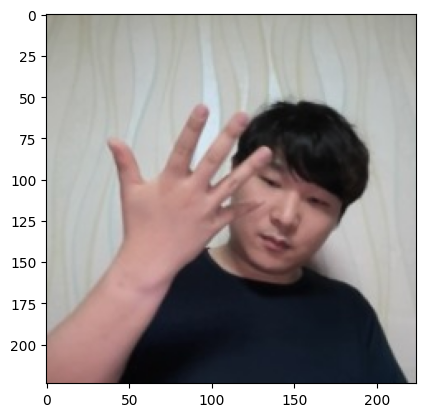

예측확률분포: [0.6009062  0.23554337 0.16355042]
라벨: 1, 예측결과: 0
197


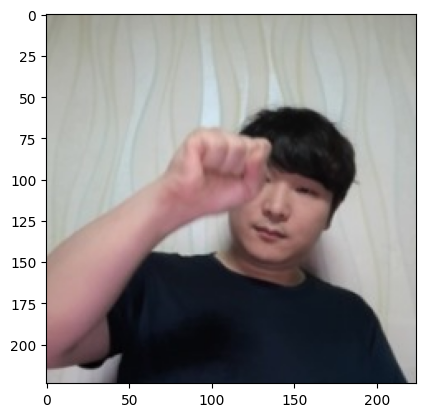

예측확률분포: [0.73451525 0.16261744 0.10286729]
라벨: 2, 예측결과: 0
237


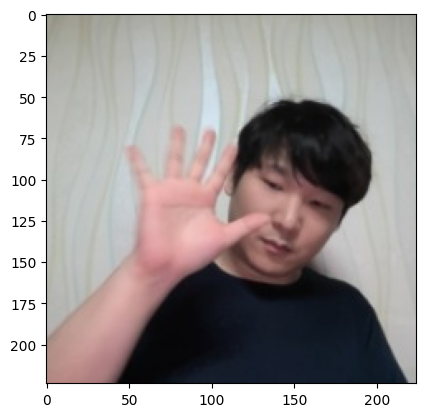

예측확률분포: [0.60693204 0.21453737 0.17853062]
라벨: 2, 예측결과: 0
300


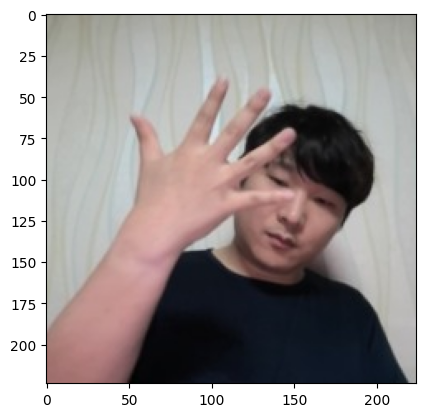

예측확률분포: [0.57075286 0.23590684 0.1933403 ]
라벨: 2, 예측결과: 0
322


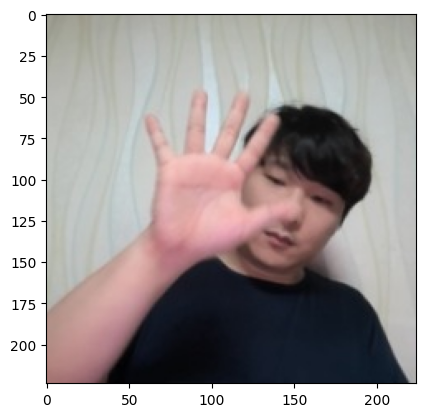

예측확률분포: [0.75184506 0.15266845 0.09548657]
라벨: 2, 예측결과: 0
272


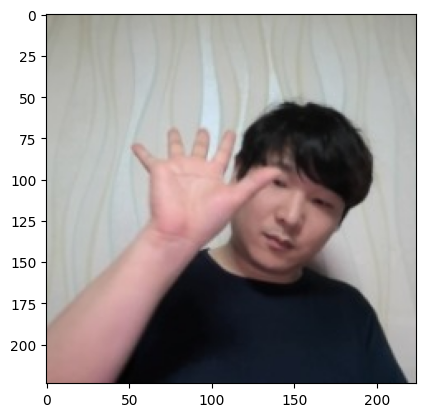

예측확률분포: [0.5984879  0.2416194  0.15989263]
라벨: 1, 예측결과: 0
145


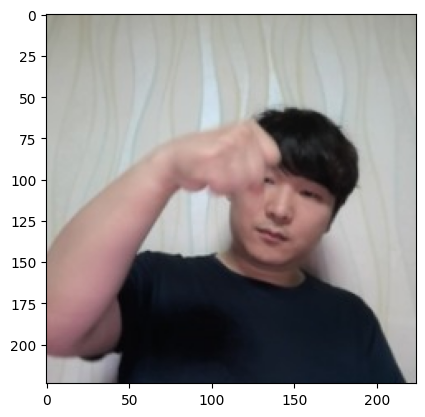

예측확률분포: [0.54354936 0.23263475 0.22381589]
라벨: 2, 예측결과: 0
296


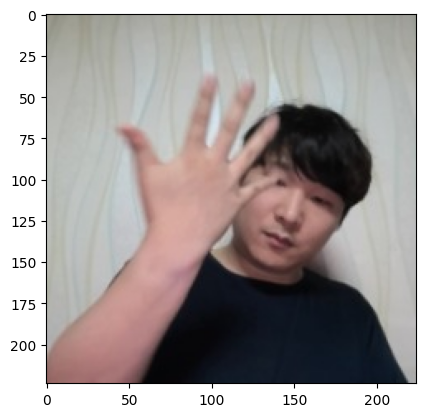

예측확률분포: [0.6459186  0.19651048 0.15757093]
라벨: 2, 예측결과: 0
263


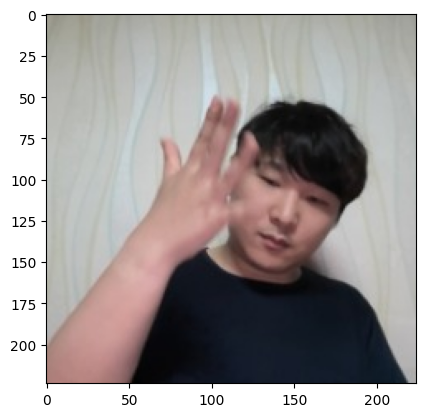

예측확률분포: [0.8310892  0.10505298 0.06385783]
라벨: 1, 예측결과: 0
202


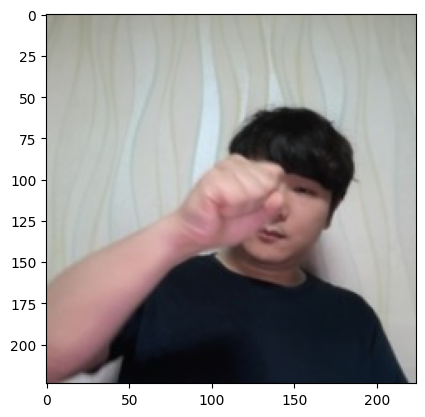

In [38]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    print(n)
    plt.show()

In [ ]:
model.save('dataset/model/model.keras', include_optimizer=False)